# Lecture: Pandas in depth

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

# Show me everything! 
# pd.options.display.max_rows = 999   
# pd.options.display.max_columns = 999 

- copies and views 
    - copy()
- data manipulations
    - assign(), map(), apply(), applymap(), trasnform()
- missing values
    - isnull(), notnull(), dropna(), fillna(), replace()
- sorting and filtering
    - sort()
- gruping and agregating 
     - groupby()
- join tables
- basic plotting


## Views and copies 
https://www.practicaldatascience.org/html/views_and_copies_in_pandas.html

In [1]:
df = pd.DataFrame({"a": np.arange(4), "b": np.arange(4)}, dtype='float')
df

NameError: name 'pd' is not defined

In [2]:
my_slice = df.iloc[1:3]
my_slice

NameError: name 'df' is not defined

In [3]:
df.iloc[1, 0] = 3.14
my_slice

NameError: name 'df' is not defined

In [ ]:
my_slice.iloc[1,0] = 999 
df

In [ ]:
df1 = pd.DataFrame({ 'a':[0,0,0], 'b': [1,1,1]})
print(df1, '\n')
df2 = df1
df2['a'] = df2['a'] + 1
print(df1)

In [ ]:
# always copy explicitly when you need it
my_slice = df["a"].copy()

## Data manipulations 

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print(A)
print(B)

In [ ]:
# similar to the numpy arrays and broadcasting 
print(A+B)

In [ ]:
C = np.random.randint(10, size=(3, 4))
# print(C - C[0])

In [ ]:
df = pd.DataFrame(C, columns=list('QRST'))
print(df)
print(df.iloc[0])
print(df - df.iloc[0])

In [ ]:
# Supstract a column? -- it's legale but generally have no sense  
df.subtract(df['S'],  axis='columns')

In [ ]:
print(df)
df.sub([1, 2, 3, 4], axis='columns')

In [ ]:
df1 = pd.DataFrame({'A':A, 'B':B})
print(df * 5 + 2)

### More transformations 

#### Assign 
Create a new column

In [8]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head(3)

# df['column_name'] is the same to df.column_name !!!
# planets['mass'] is planets.mass
# planets.mass

# What way is better to use? 

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [ ]:
# Data from https://cneos.jpl.nasa.gov/fireballs/
df = pd.read_csv('cneos_fireball_data.csv')
df.head(5)

In [ ]:
# assign

# create new column from the transforming other columns
# def my_func: ...

def orb_rad(x):
    # x is a DataFrame 
    G = 1
    return (G*x['mass']*x['orbital_period']**2 / (4*np.pi**2))**(1/3)

planets.assign(orb_rad = orb_rad(planets))

In [ ]:
# using lambda
df.assign(abs_velocity = lambda x: np.sqrt(x['vx']**2+x['vy']**2+x['vz']**2))

#### Map vs. apply vs. applymap 

===> 
https://syntaxfix.com/question/12451/difference-between-map-applymap-and-apply-methods-in-pandas 


- Apply - to one column or to one row on each elemnt at a time
- Map - to one column
- Applymap - apply to whole dataframe but element wise 

https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas 
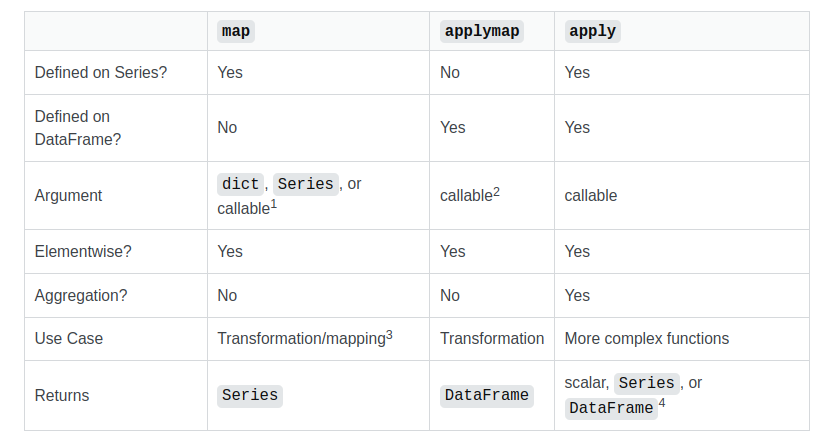

#### transform vs. apply 
apply(func, axis=0) and apply(func, axis=0)

- transform() works with function, a string function, a list of functions, and a dict. However, apply() is only allowed with function.
- transform() cannot produce aggregated results.
- apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.
- map() applyes a function, dictionary, series or list of functions but only on a series. 

In [ ]:
# map 
# The map method works on a Series and maps each value based on what is passed as arg to the function. 
# map is fast
df['Total Radiated Energy (J)'] = df['Total Radiated Energy (J)'].map(lambda x: x*10**(-9))
df = df.rename(columns={'Total Radiated Energy (J)': 'Total Radiated Energy (nJ)'})
df

In [ ]:
# apply works on dataframes and could be used for applying any function that cannot be vectorised
# add two hours to the date and time colum

# this works both with apply and map 
from datetime import timedelta
df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df['Peak Brightness Date/Time (UT)'])
df['Peak Brightness Date/Time (UT)'] = df['Peak Brightness Date/Time (UT)'].map(lambda x: x + timedelta(hours=2))
df = df.rename(columns={'Peak Brightness Date/Time (UT)':'Peak Brightness Date/Time (UTC+2)'})

df

In [ ]:
# applymap works elemntwise across multiple rows/columns -- but depricated
df_test = pd.DataFrame({'Name': ['Pankaj', 'Meghna'], 'Role': ['ceo', 'cto']})

df_test1 = df_test.applymap(str.upper)

print(df_test, '\n')
print(df_test1)

In [ ]:
# transform df
# df['Longitude (deg.)'].transform(lambda x: str(x)[-1])

df['Longitude (deg.)'].transform([lambda x: str(x)[-1]])

## GroupBy: Split, Apply, Combine
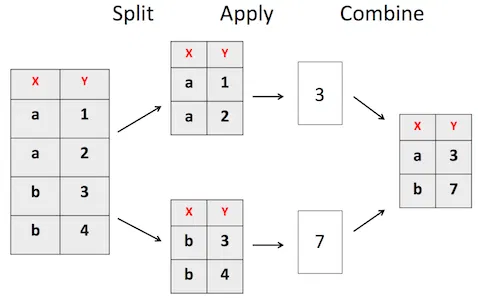

https://realpython.com/pandas-groupby/

**Aggregation functions**
- count() Total number of items
- first(), last() First and last item
- mean(), median() Mean and median
- min(), max() Minimum and maximum
- std(), var() Standard deviation and variance
- mad() Mean absolute deviation
- prod() Product of all items
- sum() Sum of all items

In [8]:
planets = sns.load_dataset('planets')
planets.head(3)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [10]:
planets['mass'].mean()

2.6381605847953216

In [5]:
planets['method'].nunique()

NameError: name 'planets' is not defined

In [9]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [11]:
# planets.mean() # it's a problem 

In [16]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [12]:
# GroupBy: Split, Apply, Combine
planets.groupby('method')

In [18]:
planets.groupby('method').nunique()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1,2,0,2,2
Eclipse Timing Variations,2,9,2,2,5
Imaging,2,12,0,26,10
Microlensing,2,7,0,9,9
Orbital Brightness Modulation,2,3,0,1,2
Pulsar Timing,2,5,0,1,4
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,6,549,379,378,21
Transit,7,397,1,146,11


In [16]:
methods_s = planets.groupby('method').sum()
methods_s.index

Index(['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing',
       'Orbital Brightness Modulation', 'Pulsar Timing',
       'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
       'Transit Timing Variations'],
      dtype='object', name='method')

In [20]:
planets.groupby('method')['orbital_period'].std()

method
Astrometry                          544.217663
Eclipse Timing Variations          2499.130945
Imaging                          213978.177277
Microlensing                       1113.166333
Orbital Brightness Modulation         0.725493
Pulsar Timing                     16313.265573
Pulsation Timing Variations                NaN
Radial Velocity                    1454.926210
Transit                              46.185893
Transit Timing Variations            71.599884
Name: orbital_period, dtype: float64

In [20]:
# describe data of the one column
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [21]:
# agregate method
planets.groupby('year').aggregate(['min', 'max'])

method                            number      \
                            min                        max    min max   
year                                                                    
1989            Radial Velocity            Radial Velocity      1   1   
1992              Pulsar Timing              Pulsar Timing      3   3   
1994              Pulsar Timing              Pulsar Timing      3   3   
1995            Radial Velocity            Radial Velocity      1   1   
1996            Radial Velocity            Radial Velocity      1   5   
1997            Radial Velocity            Radial Velocity      1   1   
1998            Radial Velocity            Radial Velocity      1   4   
1999            Radial Velocity            Radial Velocity      1   4   
2000            Radial Velocity            Radial Velocity      1   4   
2001            Radial Velocity            Radial Velocity      1   3   
2002            Radial Velocity                    Transit      1   5   
2003              Pulsar Timing            Radial Velocity      1   3   
2004                    Imaging                    Transit      1   5   
2005                    Imaging            Radial Velocity      1   4   
2006                    Imaging                    Transit      1   4   
2007                    Imaging                    Transit      1   5   
2008  Eclipse Timing Variations                    Transit      1   6   
2009  Eclipse Timing Variations                    Transit      1   3   
2010                 Astrometry                    Transit      1   6   
2011  Eclipse Timing Variations  Transit Timing Variations      1   6   
2012  Eclipse Timing Variations  Transit Timing Variations      1   6   
2013                 Astrometry  Transit Timing Variations      1   7   
2014            Radial Velocity  Transit Timing Variations      1   5   

     orbital_period                     mass         distance           
                min            max       min     max      min      max  
year                                                                    
1989      83.888000      83.888000  11.68000  11.680    40.57    40.57  
1992      25.262000      66.541900       NaN     NaN      NaN      NaN  
1994      98.211400      98.211400       NaN     NaN      NaN      NaN  
1995       4.230785       4.230785   0.47200   0.472    15.36    15.36  
1996       3.313500    1078.000000   0.68760   3.900    12.53    21.41  
1997      39.845000      39.845000   1.04000   1.040    17.43    17.43  
1998       3.097000     442.100000   0.52000   8.020     4.70    47.92  
1999       3.510000    3810.000000   0.42000   8.440    10.91    59.03  
2000       3.024000    2502.000000   0.24900  18.100     3.22    80.00  
2001       6.276000    2391.000000   0.54000  10.350    14.08    77.82  
2002       1.211919    4909.000000   0.11500  17.400    12.53   121.36  
2003       1.328300   36525.000000   0.22900  18.370    11.11   133.16  
2004       1.432475    4205.800000   0.08700   3.690    10.23  2500.00  
2005       1.937780    4270.000000   0.00600  14.000     4.70   300.30  
2006       1.796000  730000.000000   0.03300   7.600     8.77  8500.00  
2007       1.306186    1333.000000   0.03500  19.800     4.54  2000.00  
2008       1.091423  318280.000000   0.01260  25.000     4.94   680.00  
2009       0.788840   17337.500000   0.01600  21.420     8.52   550.00  
2010       1.212884   18000.000000   0.01300  13.000     4.70  2700.00  
2011       0.090706   40000.000000   0.00755  13.650     6.06  2250.00  
2012       0.742960    6005.000000   0.00360  11.100     1.35  7720.00  
2013       0.355000    4100.000000   0.00800  20.600     6.80  7560.00  
2014       0.669310    3827.000000   0.34000   2.580    20.48  1056.00

In [22]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### **Filter, transform, apply**

Filter selects groups but not records. It compares agregated groups with some value. 

In [25]:
# Exercise: how the planet's mass viries with the ear of observations

In [24]:
def filter_func(x):
    return x['mass'].mean()>2

# print(planets.groupby('year').filter(filter_func))

#and now with lambda
planets.groupby('year').filter(lambda x: x['mass'].mean()>2)

,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774000,2.21,56.95,2008
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
5,Radial Velocity,1,185.840000,4.80,76.39,2008
6,Radial Velocity,1,1773.400000,4.64,18.15,2002
...,...,...,...,...,...,...
1029,Imaging,1,NaN,NaN,10.10,2012
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [26]:
(planets[planets['method']=='Transit Timing Variations'])

,method,number,orbital_period,mass,distance,year
680,Transit Timing Variations,2,160.0000,NaN,2119.0,2011
736,Transit Timing Variations,2,57.0110,NaN,855.0,2012
749,Transit Timing Variations,3,NaN,NaN,NaN,2014
813,Transit Timing Variations,2,22.3395,NaN,339.0,2013


In [27]:
(planets[planets['method']=='Pulsar Timing'])

,method,number,orbital_period,mass,distance,year
941,Pulsar Timing,3,25.262000,NaN,NaN,1992
942,Pulsar Timing,3,66.541900,NaN,NaN,1992
943,Pulsar Timing,3,98.211400,NaN,NaN,1994
944,Pulsar Timing,1,36525.000000,NaN,NaN,2003
945,Pulsar Timing,1,0.090706,NaN,1200.0,2011


In [28]:
planets.groupby('method').filter(lambda x: x['number'].mean()>2)  #['distance'].filter()  #.filter(lambda x: x['mass'].mean()>2))

,method,number,orbital_period,mass,distance,year
680,Transit Timing Variations,2,160.000000,NaN,2119.0,2011
736,Transit Timing Variations,2,57.011000,NaN,855.0,2012
749,Transit Timing Variations,3,NaN,NaN,NaN,2014
813,Transit Timing Variations,2,22.339500,NaN,339.0,2013
941,Pulsar Timing,3,25.262000,NaN,NaN,1992
942,Pulsar Timing,3,66.541900,NaN,NaN,1992
943,Pulsar Timing,3,98.211400,NaN,NaN,1994
944,Pulsar Timing,1,36525.000000,NaN,NaN,2003
945,Pulsar Timing,1,0.090706,NaN,1200.0,2011


https://www.skytowner.com/explore/difference_between_methods_apply_and_transform_for_groupby_in_pandas

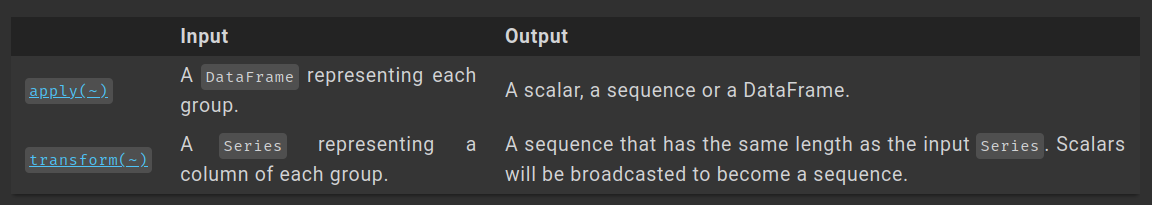

   - apply(func, axis=0): call a function func along an axis of the DataFrame. It returns the result of applying func along the given axis.
   - transform(func, axis=0): call a function func on self producing a DataFrame with transformed values. It returns a DataFrame that has the same length as self.

Transform vs. apply: similar but different

    (1) transform() works with function, a string function, a list of functions, and a dict. However, apply() is only allowed with function.
    (2) transform() cannot produce aggregated results.
    (3) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

https://stackoverflow.com/questions/27517425/whether-to-use-apply-vs-transform-on-a-group-object-to-subtract-two-columns-and
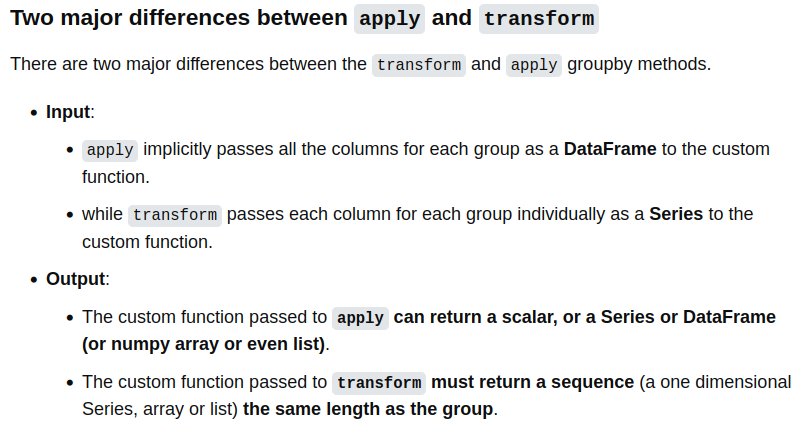

In [29]:
# transform - remains the index and doesn't reduce the table 
planets.groupby('method').transform(lambda x: x - x.mean())

,number,orbital_period,mass,distance,year
0,-0.721519,-554.054680,4.469301,25.799792,-1.518987
1,-0.721519,51.419320,-0.420699,5.349792,0.481013
2,-0.721519,-60.354680,-0.030699,-31.760208,3.481013
3,-0.721519,-497.324680,16.769301,59.019792,-0.518987
4,-0.721519,-307.134680,7.869301,67.869792,1.481013
...,...,...,...,...,...
1030,-0.954660,-17.160566,NaN,-427.298080,-5.236776
1031,-0.954660,-18.486209,NaN,-451.298080,-4.236776
1032,-0.954660,-17.910549,NaN,-425.298080,-4.236776
1033,-0.954660,-16.976990,NaN,-306.298080,-3.236776


In [39]:
groups = planets.groupby('method').apply(lambda x: x - x.mean())
groups

number  orbital_period   mass     distance  \
method                                                                         
Astrometry                113   0.000000     -384.820000    NaN     2.895000   
                          537   0.000000      384.820000    NaN    -2.895000   
Eclipse Timing Variations 32   -0.666667     5468.355556  0.925          NaN   
                          37    0.333333     1015.355556    NaN  -184.640000   
                          38    0.333333    -1430.644444    NaN  -184.640000   
...                                  ...             ...    ...          ...   
Transit                   1034 -0.954660      -16.914316    NaN  -339.298080   
Transit Timing Variations 680  -0.250000       80.216500    NaN  1014.666667   
                          736  -0.250000      -22.772500    NaN  -249.333333   
                          749   0.750000             NaN    NaN          NaN   
                          813  -0.250000      -57.444000    NaN  -765.333333   

                                    year  
method                                    
Astrometry                113   1.500000  
                          537  -1.500000  
Eclipse Timing Variations 32   -1.000000  
                          37   -2.000000  
                          38   -2.000000  
...                                  ...  
Transit                   1034 -3.236776  
Transit Timing Variations 680  -1.500000  
                          736  -0.500000  
                          749   1.500000  
                          813   0.500000  

[1035 rows x 5 columns]

In [40]:
# Multi indexing example
groups.index

MultiIndex([(               'Astrometry',  113),
            (               'Astrometry',  537),
            ('Eclipse Timing Variations',   32),
            ('Eclipse Timing Variations',   37),
            ('Eclipse Timing Variations',   38),
            ('Eclipse Timing Variations',   39),
            ('Eclipse Timing Variations',   40),
            ('Eclipse Timing Variations',   41),
            ('Eclipse Timing Variations',   42),
            ('Eclipse Timing Variations',   43),
            ...
            (                  'Transit', 1028),
            (                  'Transit', 1030),
            (                  'Transit', 1031),
            (                  'Transit', 1032),
            (                  'Transit', 1033),
            (                  'Transit', 1034),
            ('Transit Timing Variations',  680),
            ('Transit Timing Variations',  736),
            ('Transit Timing Variations',  749),
            ('Transit Timing Variations',  813)],
   

In [45]:
# apply() method for an arbitary function:  as a map() function in Python

### ---------------------- TODO apply this function to the grouped by method dataframe 
def conditions_func(num):
    if num<10:
        return "Low"
  
    elif num>= 10 :
        return "Normal"


# print(planets.groupby('mass').mean())
planets.groupby('method').apply(conditions_func(planets))

TypeError: '<' not supported between instances of 'str' and 'int'

### Exersice
1) See all years where the planets was discovered 

2) Take the most fruitful year 

3) Which year is it?

In [ ]:
# find all records that has distance greater than a mean distance within one method
# group by method -> filter against mean 

In [ ]:
dist = planets.groupby('method').apply(lambda x: x['distance'] > x['distance'].mean())
planets[dist.values]

In [ ]:
dist.values

## Sorting and filtering tables

https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

https://www.codecademy.com/learn/getting-started-with-python-for-data-science/modules/sorting-and-filtering-rows/cheatsheet

In [46]:
planets = sns.load_dataset('planets')

planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
# planets_numeric = planets[['orbital_period', 'mass', 'distance']]
# print(planets_numeric)
# print(planets_numeric.mean())
# print(type(planets_numeric.mean()))

# new_planets = planets.replace(to_replace=np.nan, value=planets_numeric.mean())

sort_values(): to sort pandas data frame by one or more columns

sort_index(): to sort pandas data frame by row index


In [50]:
# sort by a column
planets.sort_values('distance', ascending=False)

,method,number,orbital_period,mass,distance,year
951,Transit,1,4.200000,NaN,8500.0,2006
952,Transit,1,1.796000,NaN,8500.0,2006
911,Microlensing,1,NaN,NaN,7720.0,2012
912,Microlensing,1,NaN,NaN,7560.0,2013
928,Microlensing,1,NaN,NaN,4970.0,2013
...,...,...,...,...,...,...
989,Transit,1,3.161575,NaN,NaN,2011
997,Transit,1,2.423804,NaN,NaN,2011
998,Transit,1,3.126088,NaN,NaN,2011
999,Transit,1,1.430370,NaN,NaN,2011


In [53]:
# set new column as index
df1 = planets.set_index('year')
df1.sort_index()

,method,number,orbital_period,mass,distance
year,,,,,
1989,Radial Velocity,1,83.888000,11.680,40.57
1992,Pulsar Timing,3,66.541900,NaN,NaN
1992,Pulsar Timing,3,25.262000,NaN,NaN
1994,Pulsar Timing,3,98.211400,NaN,NaN
1995,Radial Velocity,1,4.230785,0.472,15.36
...,...,...,...,...,...
2014,Transit,2,15.965400,NaN,NaN
2014,Transit,2,179.612000,NaN,NaN
2014,Transit,4,6.164860,NaN,NaN


In [54]:
# filtering by index
planets.loc[planets.mass>5] # same as planets[planets.mass>5]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
8,Radial Velocity,1,993.300,10.30,73.10,2008
11,Radial Velocity,1,335.100,9.88,39.43,2009
...,...,...,...,...,...,...
620,Radial Velocity,1,745.700,5.30,307.69,2011
636,Radial Velocity,1,124.600,9.18,149.25,2013
637,Radial Velocity,1,17337.500,9.00,23.98,2009
638,Radial Velocity,1,511.098,8.82,31.33,2002


In [55]:
# filtering 
planets[planets['method']=='Radial Velocity']

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.3000,7.10,77.40,2006
1,Radial Velocity,1,874.7740,2.21,56.95,2008
2,Radial Velocity,1,763.0000,2.60,19.84,2011
3,Radial Velocity,1,326.0300,19.40,110.62,2007
4,Radial Velocity,1,516.2200,10.50,119.47,2009
...,...,...,...,...,...,...
914,Radial Velocity,1,6.9580,0.34,NaN,2014
915,Radial Velocity,1,5.1180,0.40,NaN,2014
916,Radial Velocity,1,121.7100,1.54,NaN,2014
939,Radial Velocity,1,4.4264,NaN,NaN,2012


In [56]:
#nsmallest() and nlargest()
planets.nsmallest(3, 'mass', keep='last')

,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.23570,0.00360,1.35,2012
128,Radial Velocity,4,3.14942,0.00600,6.27,2005
263,Radial Velocity,3,40.11400,0.00755,6.06,2011


In [57]:
planets[randindex]

NameError: name 'randindex' is not defined

In [ ]:
# missingno.matrix(new_planets)

In [ ]:
# # Why aren't the same??? 
# df1=planets.replace(to_replace=np.nan, value = 0)
# df2= planets.fillna(0)

# df1 is df2

## Combining tables

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://realpython.com/pandas-merge-join-and-concat/


**There are 3 ways to combine tables**
- merge() for combining data on common columns or indices
- .join() for combining data on a key column or an index
- concat() for combining DataFrames across rows or columns


### Concatenate

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'A': ['A2', 'A3'],
                    'B': ['B2', 'B3'],},
                    index=[2, 3])

frames = [df1, df2]
pd.concat(frames)

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'C': ['C0', 'C1'],
                    'D': ['D0', 'D1'],},
                    index=[0, 1])

frames = [df1, df2]
pd.concat(frames, axis='columns')


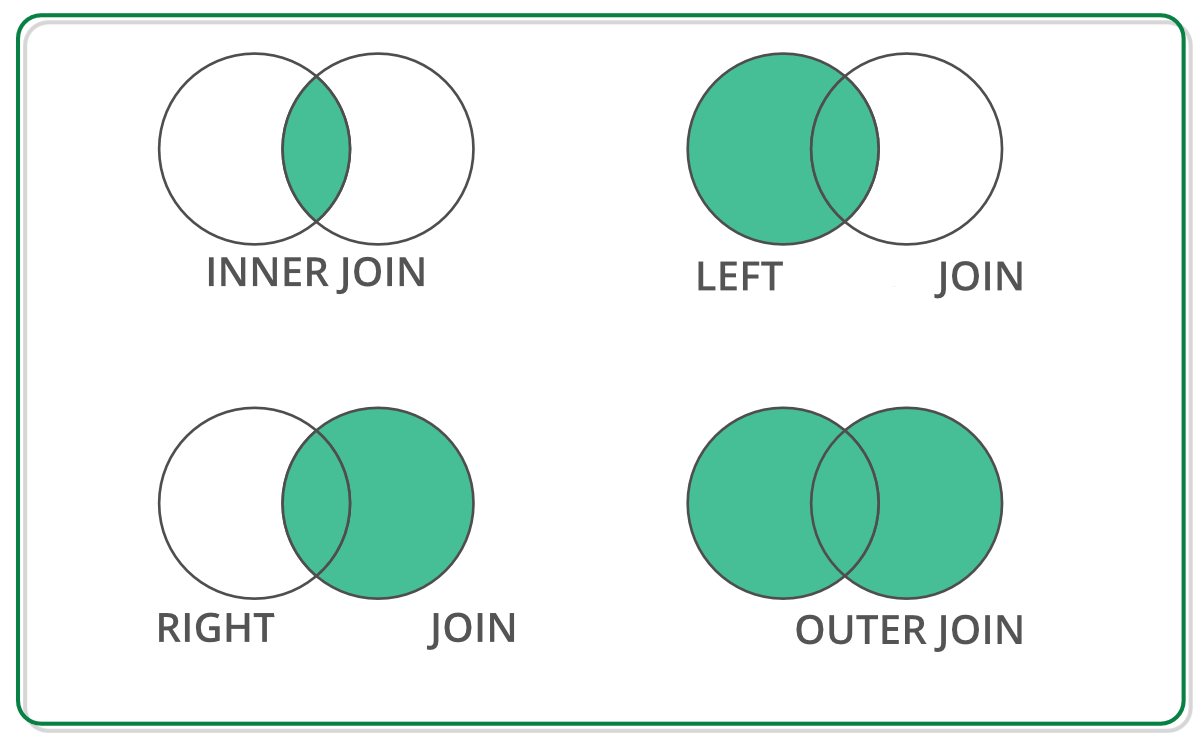

In [ ]:
# one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values)
# many-to-one joins: for example when joining an index (unique) to one or more columns in a DataFrame
# many-to-many joins: joining columns on columns.


In [ ]:
arr1 = np.array([1, 2, 3, 2, 3, 4, 4, 5, 6])
# arr2 = np.array([[0, 0, 0], [0, 0, 4], [4, 5, 6]])
arr2 = arr1.copy()
arr3 = arr1.view()

print(arr1.flags['OWNDATA'])
print(arr2.flags)
print(arr3.flags)

In [ ]:
print(arr1.base)

In [ ]:
# Copy or view? 

df = pd.DataFrame([[1,2,3,4],[5,6,7,8]], index = ['row1','row2'], 
        columns = ['a','b','c','d'])
df2 = df.iloc[0:2, :]
df3 = df.loc[df['a'] == 1, :]

# df is neither copy nor view
print('df is neither copy nor view')
print(df._is_view, df._is_copy)

# df2 is a view AND a copy
print('\ndf2 is a view AND a copy')
print(df2._is_view, df2._is_copy)

# df3 is not a view, but a copy
print('\ndf3 is not a view, but a copy')
print(df3._is_view, df3._is_copy)


## Handling missing values

https://medium.com/@roshankg96/handling-missing-data-in-pandas-a3c8dfbd1db

**NA vs. NaN** 

https://note.nkmk.me/en/python-pandas-nan-none-na/

- NaN: Not a Number. NaN is a missing floating-point value. 
- None is a Python Object called NoneType.
- pd.NA - Pandas object

In [ ]:
print(type(np.nan))
print(type(None))
print(type(pd.NA))

In [ ]:
np.nan == np.nan

In [ ]:
pd.NA == pd.NA

In [ ]:
None == None

### Functions

isnull(), notnull(), dropna(), fillna(), replace()

In [ ]:
# planets

In [ ]:
print(planets.shape)
print(planets.info())

### Vizualize with missingno 

In [ ]:
# !pip install missingno

In [ ]:
import missingno

In [ ]:
missingno.matrix(planets, figsize = (30,10));

In [ ]:
# Take the most sparse column
print(planets.isnull().head(5) )# opposite is notnull()
print(planets.notnull().head(5) )#

In [ ]:
missingno.matrix(planets.dropna(), figsize = (15,5));
planets.dropna()

In [ ]:
# drop columns
planets.dropna(axis = 'columns')

In [ ]:
# Drop rows with missing values in column 'mass'
planets.dropna(subset=['mass', 'distance'])

In [ ]:
missingno.matrix(planets.dropna(subset=['mass']))

In [ ]:
# drop nan
print('Full table', len(planets['mass']))
print('After dropping NaN', len(planets['mass'].dropna()))

# Just one column - series
planets['mass'].dropna()

In [ ]:
# drop columns with nan
# missingno.matrix(planets.dropna(axis='columns'), figsize = (15,5));

In [ ]:
# fill nan with 0
planets.fillna(0).tail()    

In [ ]:
# forward-fill
# planets.fillna(method='ffill')['mass'].plot()
planets.ffill()['mass'].plot()


In [ ]:
# back-fill
planets.fillna(method='bfill', axis=1)['mass'].plot()

In [ ]:
interpolate() 

### Exercise
Replace NaN with mean value via the column


## Visualization in Pandas

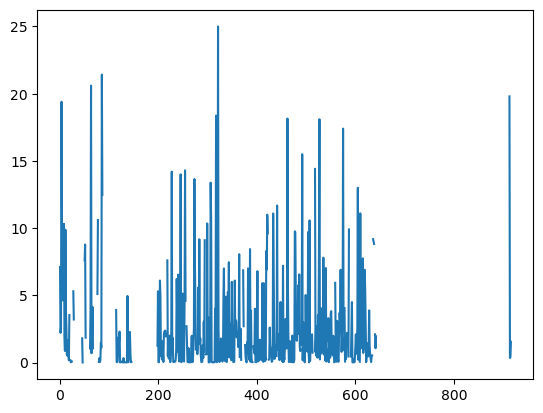

In [59]:
# Does the planet mass somehow depend on the year of observation? 
# We should consider the minimal mass per year
# We shoud group by Methods 
# We should sort by year
# Plot and check trends 
planets['mass'].plot();

<Axes: xlabel='method'>

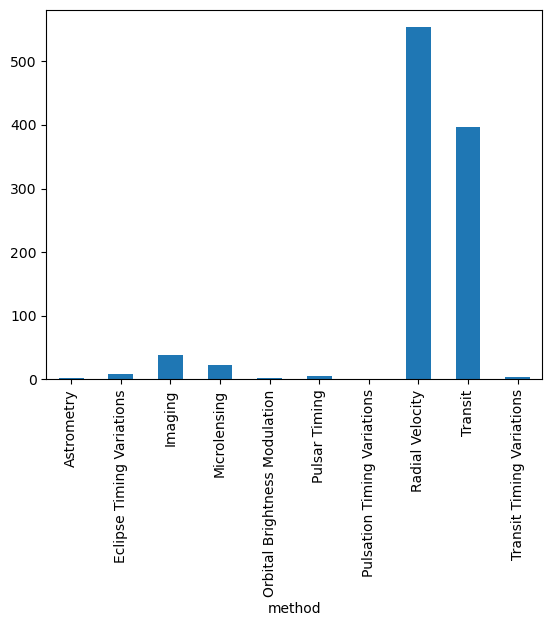

In [60]:
planets.groupby('method').count()['number'].plot.bar()

In [61]:
28/6

4.666666666666667

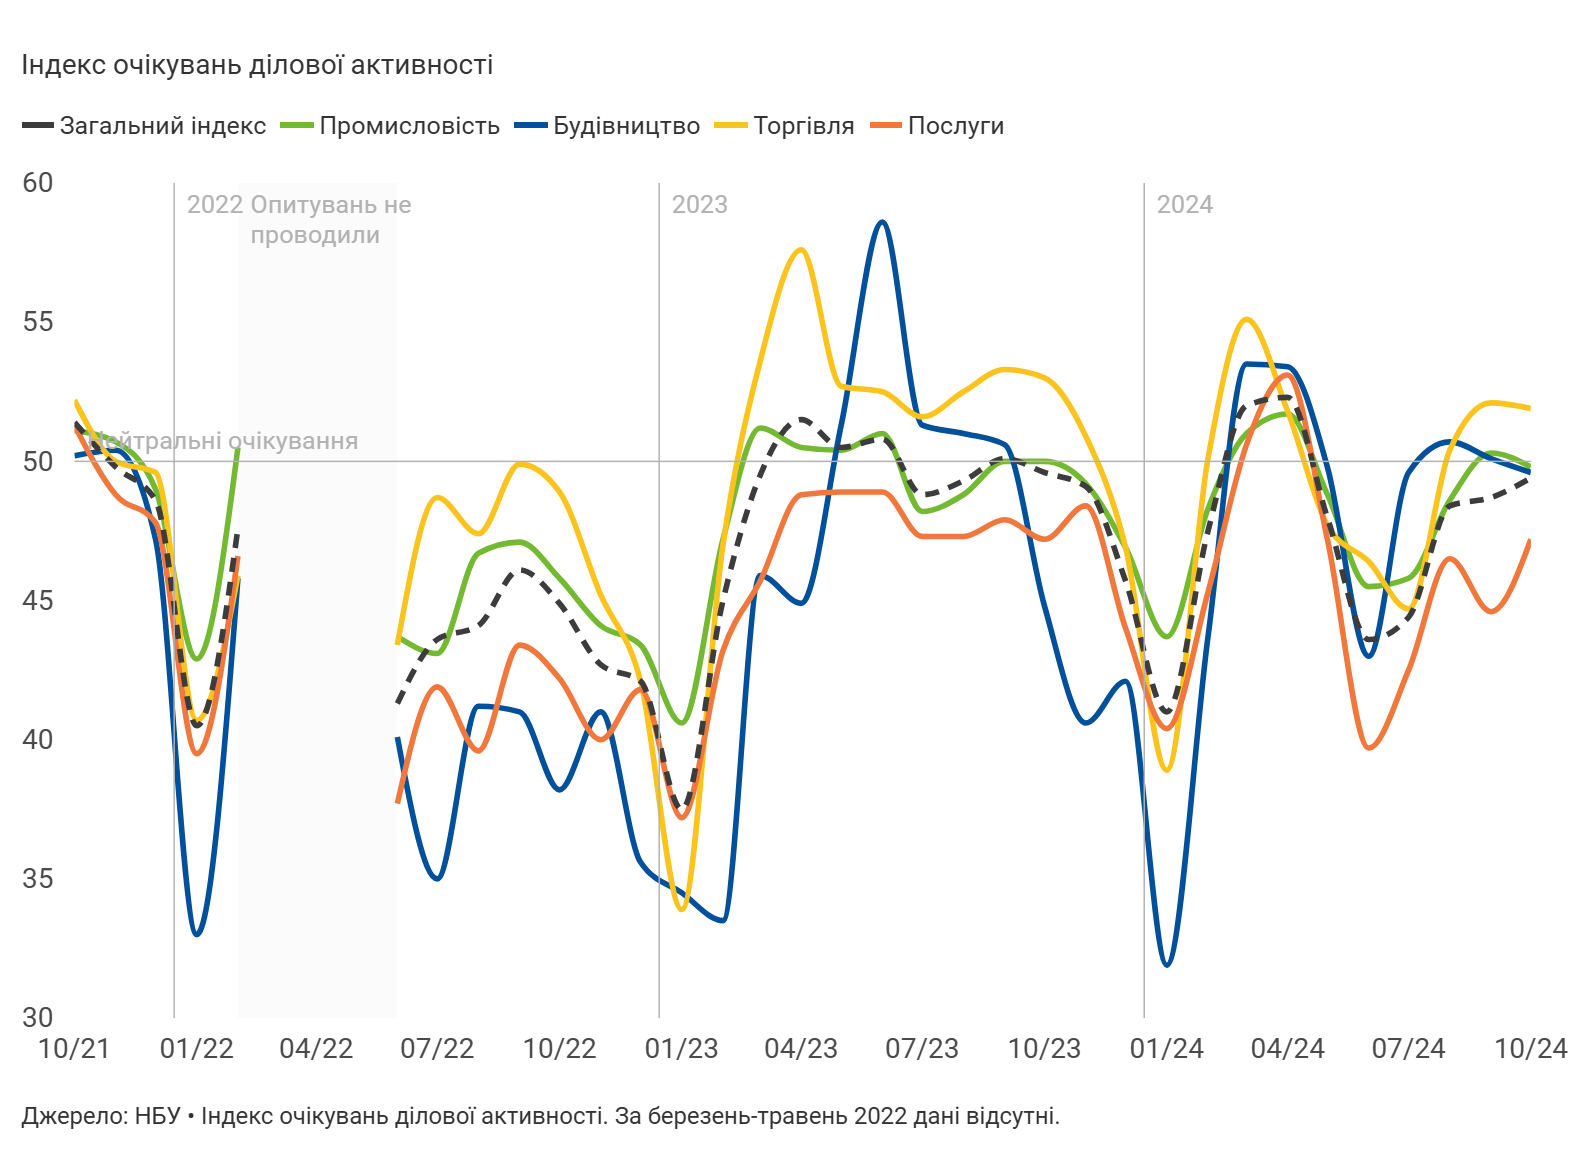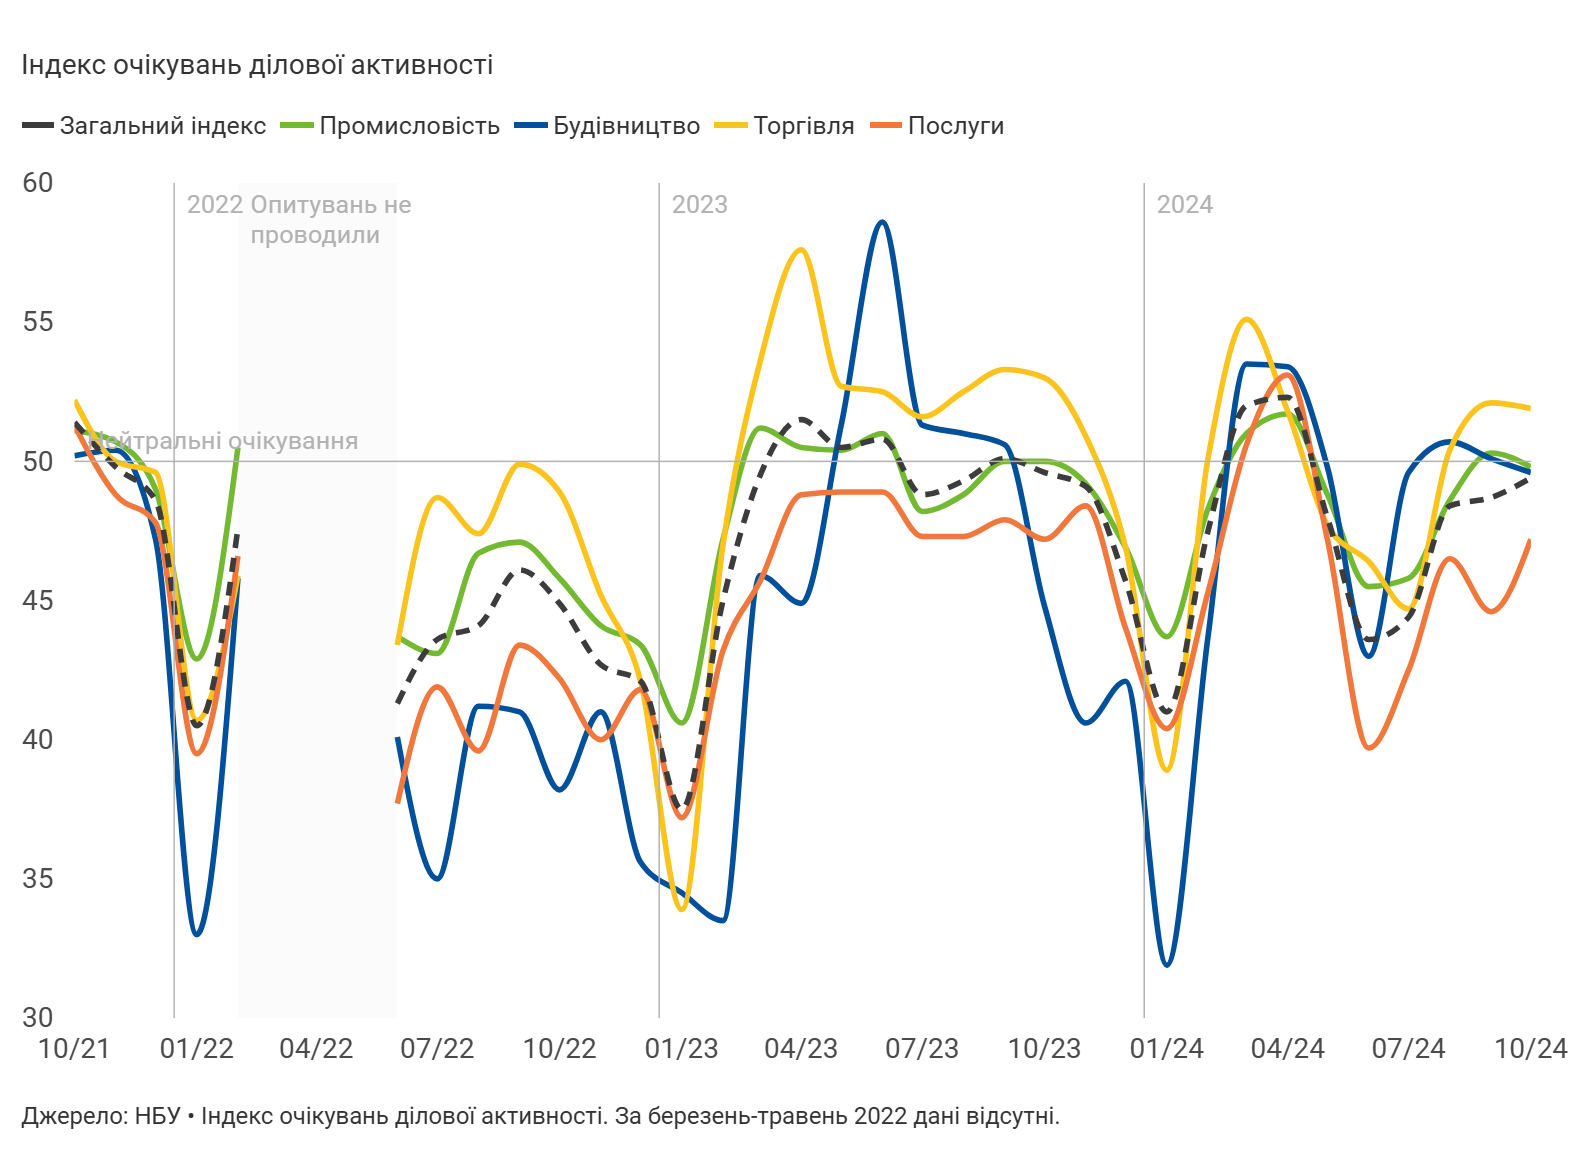